## Bonds and Interest rates
Ismael Oulkhir


Mail: oulkhir.ismael@gmail.com

LinkedIn: https://www.linkedin.com/in/ismail-oulkhir/


In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Arbitrage-Free Price of the Golden Logarithm (GL) in the Black-Scholes Model (Arbitrage Theory : Bjork)

## 1. **Black-Scholes Model Setup**
The Black-Scholes model assumes that the stock price $ S_t $ follows a geometric Brownian motion under the **risk-neutral measure**:
$
dS_t = r S_t \, dt + \sigma S_t \, dW_t
$
Where:
- $ r $: Risk-free interest rate (constant).
- $ \sigma $: Volatility of the stock price (constant).
- $ W_t $: Standard Brownian motion under the risk-neutral measure.

The solution to this stochastic differential equation is:
$
S_T = S_t \exp\left( \left( r - \frac{\sigma^2}{2} \right) (T - t) + \sigma (W_T - W_t) \right)
$

---

## 2. **Payoff of the Golden Logarithm (GL)**
The payoff of the GL at maturity $ T $ is:
$
\Phi(S_T) = \ln(S_T)
$

---

## 3. **Compute the Expected Payoff**
The arbitrage-free price of the GL at time $ t $, denoted $ \text{GL}_t $, is the expected value of the discounted payoff under the risk-neutral measure:
$
\text{GL}_t = e^{-r(T - t)} \mathbb{E}^Q[\ln(S_T) \mid \mathcal{F}_t]
$
Where:
- $ \mathbb{E}^Q $: Expectation under the risk-neutral measure $ Q $.
- $ \mathcal{F}_t $: Information available at time $ t $.

---

## 4. **Express $ \ln(S_T) $ in Terms of $ S_t $**
From the solution of the geometric Brownian motion:
$
\ln(S_T) = \ln(S_t) + \left( r - \frac{\sigma^2}{2} \right) (T - t) + \sigma (W_T - W_t)
$

---

## 5. **Compute the Expectation**
Under the risk-neutral measure, $ W_T - W_t $ is normally distributed with mean $ 0 $ and variance $ T - t $. Therefore:
$
\mathbb{E}^Q[\ln(S_T) \mid \mathcal{F}_t] = \ln(S_t) + \left( r - \frac{\sigma^2}{2} \right) (T - t)
$

---

## 6. **Discount the Expected Payoff**
The arbitrage-free price of the GL at time $ t $ is:
$
\text{GL}_t = e^{-r(T - t)} \left( \ln(S_t) + \left( r - \frac{\sigma^2}{2} \right) (T - t) \right)
$

---

## 7. **Final Formula**
The arbitrage-free price process for the Golden Logarithm (GL) is:
$
\text{GL}_t = e^{-r(T - t)} \left( \ln(S_t) + \left( r - \frac{\sigma^2}{2} \right) (T - t) \right)
$

---

## 8. **Interpretation**
- The price $ \text{GL}_t $ depends on:
  - The current stock price $ S_t $.
  - The time to maturity $ T - t $.
  - The risk-free rate $ r $.
  - The volatility $ \sigma $.
- If $ S_T < 1 $, the holder of the GL must pay a positive amount to F &H INC, as $ \ln(S_T) $ becomes negative.

In [8]:
# Parameters
T = 1  # Maturity time (1 year)
r = 0.0477  # Risk-free rate (4.77%) FED FUND RATE
sigma = 0.67  # Volatility (67%) from market chameleon 

# Fetch TSLA price data for the past year
tsla = yf.Ticker("TSLA")
tsla_data = tsla.history(period="1y")
tsla_prices = tsla_data['Close'].values
dates = tsla_data.index

# Time to maturity (in years)
time_to_maturity = np.linspace(T, 0, len(tsla_prices))[::-1]

In [9]:
# Compute the arbitrage-free price of the Golden Logarithm (GL)
gl_prices = np.exp(-r * time_to_maturity) * (
    np.log(tsla_prices) + (r - 0.5 * sigma**2) * time_to_maturity
)

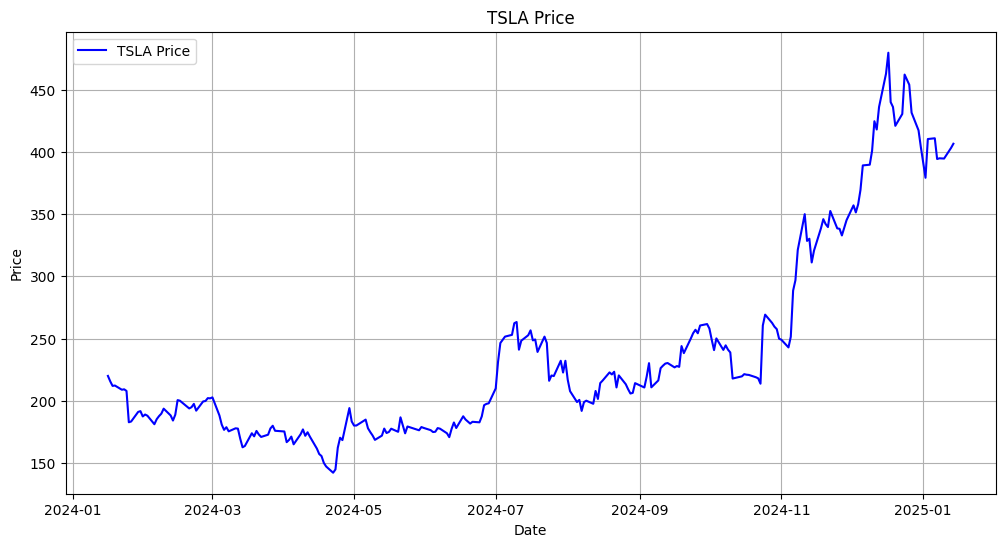

In [10]:
# Plot TSLA price data and GL price data
plt.figure(figsize=(12, 6))
plt.plot(dates, tsla_prices, label="TSLA Price", color="blue")
plt.title("TSLA Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

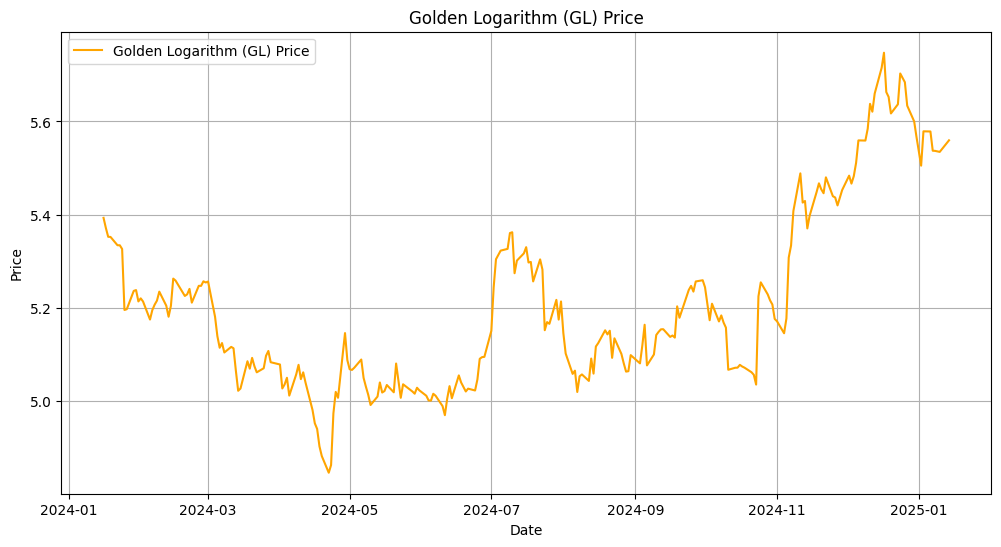

In [11]:
# Plot TSLA price data and GL price data
plt.figure(figsize=(12, 6))
plt.plot(dates, gl_prices, label="Golden Logarithm (GL) Price", color="orange")
plt.title("Golden Logarithm (GL) Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()